#### Based on:  
https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/ipynb_with_output/Document%20classification%20with%20word%20embeddings%20tutorial%20-%20with%20output.ipynb

In [1]:
from classification_functions import *

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

## Exploring the data



In [3]:
df = pd.read_pickle('metatable_preprocessed.pkl')

Размер корпуса в словах:

In [4]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

1926694

In [5]:
df.groupby('tradition')['tradition'].count()

tradition
Американская литература          201
Античная литература               49
Британская литература             21
Европейская литература           543
Латиноамериканская литература     14
Прочая восточная литература        7
Прочая европейская литература     24
Прочая литература                113
Русская литература               499
Скандинавская литература          39
Name: tradition, dtype: int64

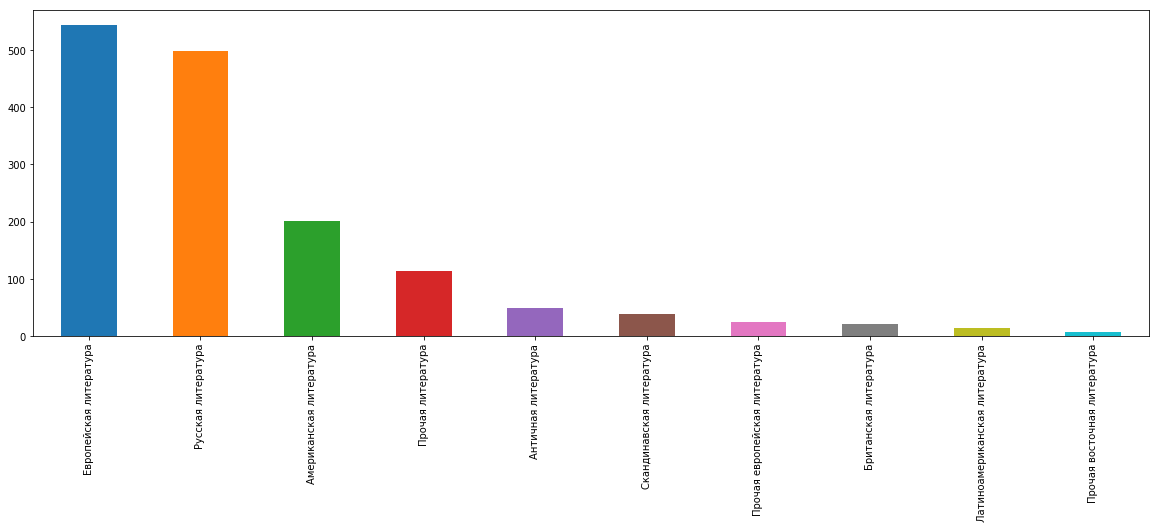

In [6]:
df.tradition.value_counts().plot(kind="bar")

Можно вывести текст и информацию о нём по индексу:  
(в переменную ```label``` нужно записать название интересующей колонки датафрема)

In [7]:
index = 1345
label = 'tradition'
print_plot(df, index, label)

В карпатское село Тухля приезжает боярин Тугар Волк. Князь Даниил даровал ему эти земли. Волк отправляется охотиться на медведей с гостями и смелой красавицей-дочерью Мирославой. Она получила мужское воспитание, обладает сильным духом и владеет навыками настоящего рыцаря. «Вот девушка! Такой бы подстать мужчиной быть» — восхищаются тухольцы, увидев её. Проводником бояре берут Максима Беркута, сына авторитетного в сельской общине старца Захара. Во время охоты Мирослава проваливается в логово медведицы. В решающую минуту от смерти её спасает Максим. В знак благодарности девушка горячо сжимает руку спасителя. Молодые люди очарованы друг другом. Максим Беркут ведёт Тугара и Мирославу своим селом. Тухля находится в долине, окружённой со всех сторон скалами, в своеобразном котле. Сюда водопадом падает горный ручей, «извиваясь ужом по долине». Юноша рассказывает об общинном суде: на него собираются почтенные старцы села. Беркут зовёт и Тугара Волка. Но боярин считает оскорбительным быть равны

### Train/Test split

In [8]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

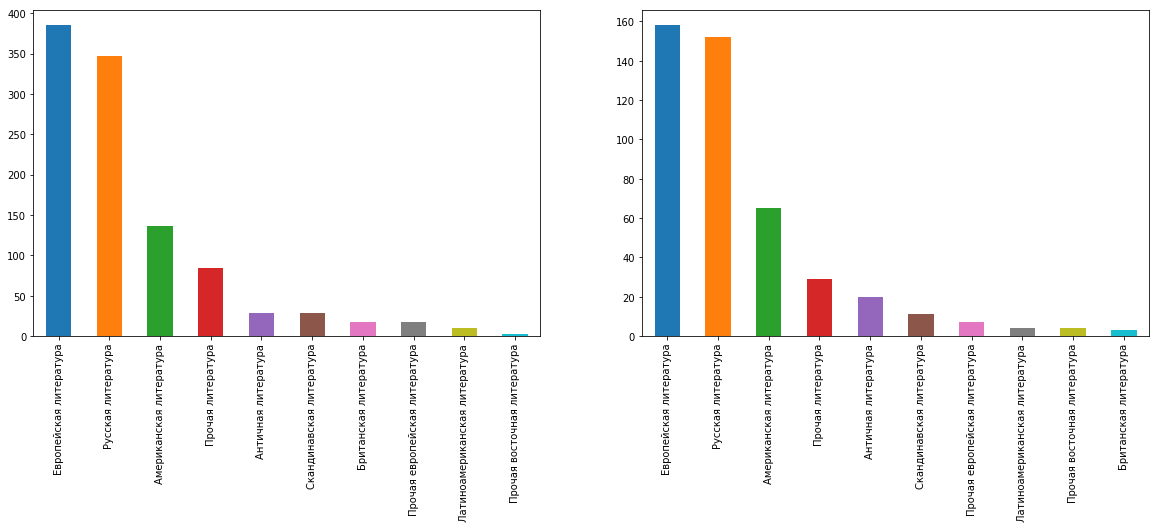

In [9]:
fig, axs = plt.subplots(1,2)
train_data.tradition.value_counts().plot(kind="bar", ax=axs[0])
test_data.tradition.value_counts().plot(kind="bar", ax=axs[1])

In [10]:
traditions = df.groupby('tradition')['tradition'].count().index

## Baseline: bag of words, n-grams, tf-idf
Let's start with some simple baselines before diving into more advanced methods.

In [11]:
STOPWORDS = nltk.corpus.stopwords.words('russian')
TOKENIZER = nltk.tokenize.word_tokenize

### Bag of words

The simplest document feature is just a count of each word occurrence in a document.

In [12]:
%%time

count_vectorizer = CountVectorizer(analyzer="word", max_features=3000, tokenizer=TOKENIZER, stop_words=STOPWORDS) 
train_data_features = count_vectorizer.fit_transform(train_data['text'])
test_data_features = count_vectorizer.transform(test_data['text'])

CPU times: user 32.2 s, sys: 241 ms, total: 32.4 s
Wall time: 32.2 s


Multi-modal logistic regression is a simple white-box classifier. We will use either logistic regression or KNN throughout this tutorial.

In [13]:
%%time

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data['tradition'])

CPU times: user 1.52 s, sys: 0 ns, total: 1.52 s
Wall time: 1.52 s


In [14]:
count_vectorizer.get_feature_names()[2680:2700]

['толпа',
 'толпы',
 'тома',
 'томас',
 'томми',
 'тому',
 'тони',
 'тотчас',
 'точки',
 'точно',
 'требует',
 'требуют',
 'третий',
 'третьего',
 'тридцать',
 'трое',
 'троих',
 'трон',
 'труд',
 'труда']

In [15]:
predictions = logreg.predict(test_data_features)

                               precision    recall  f1-score   support

      Американская литература       0.60      0.45      0.51        65
          Античная литература       1.00      0.80      0.89        20
        Британская литература       0.00      0.00      0.00         3
       Европейская литература       0.65      0.73      0.68       158
Латиноамериканская литература       0.00      0.00      0.00         4
  Прочая восточная литература       0.00      0.00      0.00         4
Прочая европейская литература       0.00      0.00      0.00         7
            Прочая литература       0.46      0.41      0.44        29
           Русская литература       0.73      0.86      0.79       152
     Скандинавская литература       0.83      0.45      0.59        11

                  avg / total       0.65      0.68      0.66       453

accuracy  0.6777041942604857
Макросредняя F1 мера -  0.38967844546031494
Микросредняя F1 мера -  0.6777041942604857

confusion matrix
 [[ 29   0 

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


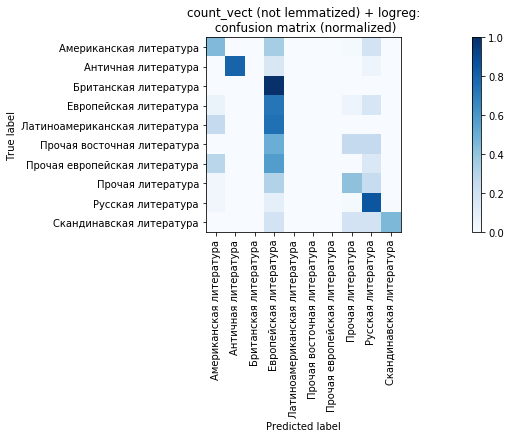

In [16]:
evaluate_prediction(test_data['tradition'], predictions, traditions,
                    title='count_vect (not lemmatized) + logreg:\n confusion matrix')

In [17]:
save_wordlists(count_vectorizer, 'count_logreg', logreg, traditions)

In [18]:
index = 50

print(df.loc[index, 'tradition'])
print(logreg.predict(count_vectorizer.transform([df.loc[index, 'text']])))
df.loc[index, 'text'][:1000]

Античная литература
['Античная литература']


'Герой романа Луций (случайно ли совпадение с именем автора?!) путешествует по Фессалии. В пути он слышит увлекательные и страшные истории о колдовских чарах, превращениях и прочих ведьмовских проделках. Луций прибывает в фессалийский город Гипату и останав ливается в доме некоего Милона, который «набит деньгами, страшный богатей, но скуп донельзя и всем известен как человек преподлый и прегрязный». Во всем античном мире Фессалия славилась как родина магического искусства, и вскоре Луций убеждается в этом на собственном печальном опыте. В доме Милона у него завязывается роман со служанкой Фотидой, которая открывает любовнику тайну своей хозяйки. Оказывается, Памфила (так зовут жену Милона) с помощью чудесной мази может превращаться, предположим, в сову. Луций страстно хочет испытать это, и Фотида в конце концов поддается на его просьбы: оказывает содействие в столь рискованном деле. Но, проникнув тайно в комнату хозяйки, она перепутала ящички, и в итоге Луций превращается не в птицу, а

In [19]:
%%time

count_vectorizer_lemmatized = count_vectorizer.set_params(stop_words=None, lowercase=False, tokenizer=lambda x: x)
train_data_features_lemmatized = count_vectorizer_lemmatized.fit_transform(train_data['text_pymystem_list'])

CPU times: user 778 ms, sys: 7.82 ms, total: 786 ms
Wall time: 784 ms


In [20]:
%%time

logreg = logreg.fit(train_data_features_lemmatized, train_data['tradition'])

CPU times: user 1.42 s, sys: 23 µs, total: 1.42 s
Wall time: 1.42 s


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                               precision    recall  f1-score   support

      Американская литература       0.71      0.57      0.63        65
          Античная литература       1.00      0.85      0.92        20
        Британская литература       0.00      0.00      0.00         3
       Европейская литература       0.65      0.74      0.69       158
Латиноамериканская литература       0.00      0.00      0.00         4
  Прочая восточная литература       0.00      0.00      0.00         4
Прочая европейская литература       0.00      0.00      0.00         7
            Прочая литература       0.67      0.48      0.56        29
           Русская литература       0.76      0.89      0.82       152
     Скандинавская литература       0.25      0.09      0.13        11

                  avg / total       0.67      0.71      0.69       453

accuracy  0.7086092715231788
Макросредняя F1 мера -  0.37531781896383665
Микросредняя F1 мера -  0.7086092715231789

confusion matrix
 [[ 37   0 

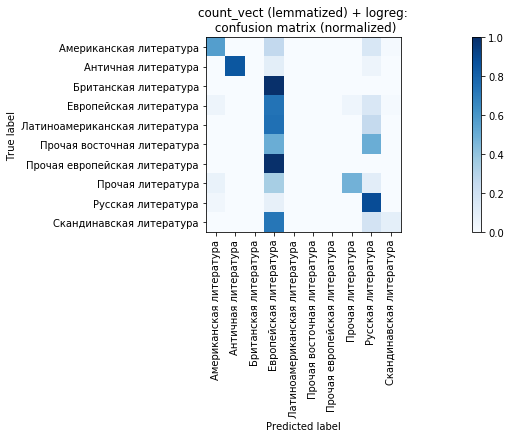

In [21]:
y_pred = logreg.predict(count_vectorizer_lemmatized.transform(test_data['text_pymystem_list']))

evaluate_prediction(test_data['tradition'], y_pred, traditions,
                    title='count_vect (lemmatized) + logreg:\n confusion matrix')

In [22]:
def get_words_coef(vectorizer, logreg, genre_index=0, num_words=20):
    features = vectorizer.get_feature_names()
    max_coef = sorted(enumerate(logreg.coef_[genre_index]), key=lambda x:x[1], reverse=True)
    return {features[x[0]]:x[1] for x in max_coef[:num_words]}

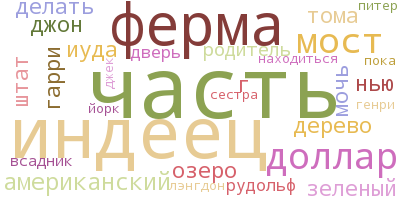

In [23]:
# пример wordcloud
import wordcloud

b = get_words_coef(count_vectorizer_lemmatized, logreg, genre_index=0, num_words=30)
w = wordcloud.WordCloud(background_color='white', colormap='tab20b', random_state=2)
w.generate_from_frequencies(b)
w.to_image()

In [24]:
tradition_tag_id = 0
print(traditions[tradition_tag_id])
most_influential_words(count_vectorizer, logreg, tradition_tag_id)

Американская литература


['часть',
 'индеец',
 'ферма',
 'доллар',
 'мост',
 'американский',
 'гарри',
 'тома',
 'делать',
 'дерево',
 'мочь',
 'озеро',
 'штат',
 'зеленый',
 'г',
 'джон',
 'иуда',
 'нью',
 'родитель',
 'рудольф']

In [25]:
save_wordlists(count_vectorizer_lemmatized, 'count_lemmatized_logreg', logreg, traditions)

In [26]:
# проверить, есть ли имя Владимир в текстах русской литературы
df[df['tradition'] == 'Русская литература']['text'].str.contains('Владимир').sum()

34

### Character N-grams

In [27]:
%%time
n_gram_vectorizer = CountVectorizer(
    analyzer="char",
    ngram_range=([2,5]),
    tokenizer=None,    
    preprocessor=None,                               
    max_features=3000) 

logreg = LogisticRegression(n_jobs=-1, C=1e5)

train_data_features = n_gram_vectorizer.fit_transform(train_data['text'])

logreg = logreg.fit(train_data_features, train_data['tradition'])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


CPU times: user 46.1 s, sys: 435 ms, total: 46.5 s
Wall time: 46.5 s


In [28]:
n_gram_vectorizer.get_feature_names()[50:60]

[' вм', ' вме', ' вн', ' во', ' во ', ' воз', ' вос', ' вр', ' вре', ' врем']

The results are worse than using a tokenizer and bag of words. Probably due to not removing the stop words.

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                               precision    recall  f1-score   support

      Американская литература       0.62      0.57      0.59        65
          Античная литература       0.88      0.70      0.78        20
        Британская литература       0.00      0.00      0.00         3
       Европейская литература       0.67      0.69      0.68       158
Латиноамериканская литература       0.00      0.00      0.00         4
  Прочая восточная литература       0.00      0.00      0.00         4
Прочая европейская литература       0.00      0.00      0.00         7
            Прочая литература       0.65      0.52      0.58        29
           Русская литература       0.72      0.88      0.79       152
     Скандинавская литература       0.75      0.27      0.40        11

                  avg / total       0.66      0.69      0.67       453

accuracy  0.6887417218543046
Макросредняя F1 мера -  0.38187279888415765
Микросредняя F1 мера -  0.6887417218543046

confusion matrix
 [[ 37   0 

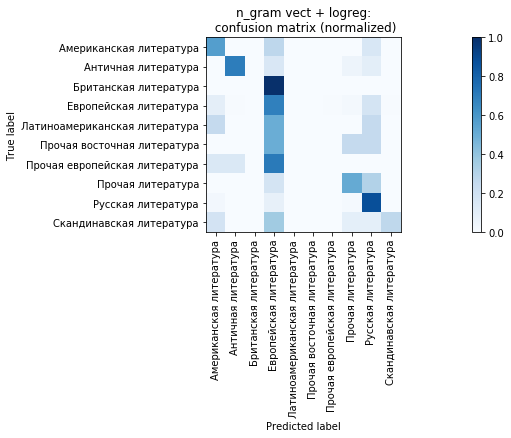

In [29]:
y_pred = logreg.predict(n_gram_vectorizer.transform(test_data['text']))

evaluate_prediction(test_data['tradition'], y_pred, traditions,
                    title='n_gram vect + logreg:\n confusion matrix')

In [30]:
save_wordlists(n_gram_vectorizer, 'ngram_logreg', logreg, traditions)

### TF-IDF

[Term Frequency - Inverse Document Frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) is a little more advanced way to count words in a document.
It adjusts for document length, word frequency and most importantly for frequency of a particular word in a particular document.


In [31]:
%%time
tf_vect_not_lemmatized = TfidfVectorizer(min_df=2, tokenizer=TOKENIZER, stop_words=STOPWORDS, lowercase=False)
train_data_features = tf_vect_not_lemmatized.fit_transform(train_data['text'])

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data['tradition'])

CPU times: user 26.2 s, sys: 24.2 ms, total: 26.2 s
Wall time: 26.2 s


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                               precision    recall  f1-score   support

      Американская литература       0.86      0.49      0.63        65
          Античная литература       1.00      0.80      0.89        20
        Британская литература       0.00      0.00      0.00         3
       Европейская литература       0.64      0.87      0.74       158
Латиноамериканская литература       0.00      0.00      0.00         4
  Прочая восточная литература       0.00      0.00      0.00         4
Прочая европейская литература       0.00      0.00      0.00         7
            Прочая литература       0.86      0.41      0.56        29
           Русская литература       0.81      0.89      0.85       152
     Скандинавская литература       1.00      0.36      0.53        11

                  avg / total       0.74      0.74      0.72       453

accuracy  0.7439293598233996
Макросредняя F1 мера -  0.4196143205695086
Микросредняя F1 мера -  0.7439293598233997

confusion matrix
 [[ 32   0  

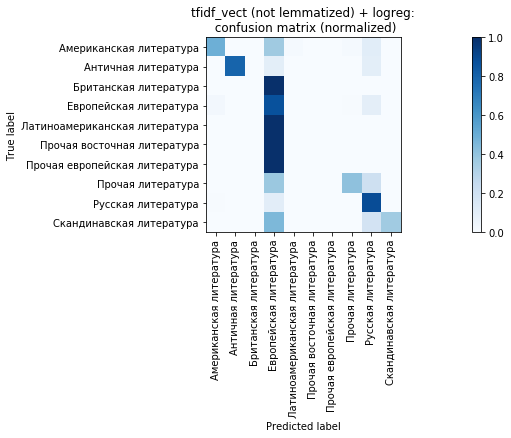

In [32]:
y_pred = logreg.predict(tf_vect_not_lemmatized.transform(test_data['text']))

evaluate_prediction(test_data['tradition'], y_pred, traditions,
                    title='tfidf_vect (not lemmatized) + logreg:\n confusion matrix')

In [33]:
%%time
tf_vect = TfidfVectorizer(min_df=2, tokenizer=lambda x: x, lowercase=False)
train_data_features = tf_vect.fit_transform(train_data['text_pymystem_list'])

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data['tradition'])

CPU times: user 3.03 s, sys: 300 ms, total: 3.33 s
Wall time: 2.93 s


In [34]:
tf_vect.get_feature_names()[1000:1010]

['безупречный',
 'безусловно',
 'безусловный',
 'безуспешно',
 'безуспешный',
 'безусый',
 'безутешно',
 'безутешный',
 'безучастно',
 'безучастный']

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                               precision    recall  f1-score   support

      Американская литература       0.77      0.55      0.64        65
          Античная литература       0.94      0.80      0.86        20
        Британская литература       0.00      0.00      0.00         3
       Европейская литература       0.65      0.83      0.73       158
Латиноамериканская литература       0.00      0.00      0.00         4
  Прочая восточная литература       0.00      0.00      0.00         4
Прочая европейская литература       0.00      0.00      0.00         7
            Прочая литература       0.94      0.55      0.70        29
           Русская литература       0.83      0.91      0.87       152
     Скандинавская литература       0.67      0.18      0.29        11

                  avg / total       0.73      0.75      0.73       453

accuracy  0.7483443708609272
Макросредняя F1 мера -  0.40840972430323996
Микросредняя F1 мера -  0.7483443708609272

confusion matrix
 [[ 36   0 

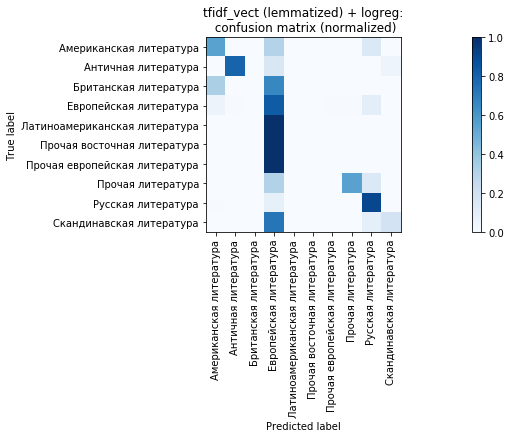

In [35]:
y_pred = logreg.predict(tf_vect.transform(test_data['text_pymystem_list']))

evaluate_prediction(test_data['tradition'], y_pred, traditions,
                    title='tfidf_vect (lemmatized) + logreg:\n confusion matrix')

In [36]:
save_wordlists(tf_vect, 'tfidf_logreg', logreg, traditions)

In [37]:
tradition_tag_id = 0
print(traditions[tradition_tag_id])
most_influential_words(tf_vect, logreg, tradition_tag_id)

Американская литература


['питер',
 'лэнгдон',
 'джек',
 'кира',
 'чарли',
 'инга',
 'индеец',
 'ганин',
 'тома',
 'юджин',
 'гарри',
 'рудольф',
 'доллар',
 'эшли',
 'фрэнк',
 'билл',
 'нью',
 'джонатан',
 'лебо',
 'николь']

# Averaging word vectors

Now let's use more complex features rather than just counting words.

A great recent achievement of NLP is the [word2vec embedding](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). See Chris Moody's [video](https://www.youtube.com/watch?v=vkfXBGnDplQ) for a great introduction to word2vec. 


In [38]:
%%time 

path = '/araneum_none_fasttextskipgram_300_5_2018/araneum_none_fasttextskipgram_300_5_2018.model'
model = FastText.load(os.getcwd() + path)
model.init_sims(replace=True)

2018-11-12 08:10:31,014 : INFO : loading FastText object from /media/zu_ann/OS/Users/zu_ann/Yandex.Disk/HSE/DH/dh/araneum_none_fasttextskipgram_300_5_2018/araneum_none_fasttextskipgram_300_5_2018.model
2018-11-12 08:10:34,315 : INFO : loading wv recursively from /media/zu_ann/OS/Users/zu_ann/Yandex.Disk/HSE/DH/dh/araneum_none_fasttextskipgram_300_5_2018/araneum_none_fasttextskipgram_300_5_2018.model.wv.* with mmap=None
2018-11-12 08:10:34,321 : INFO : loading syn0_vocab from /media/zu_ann/OS/Users/zu_ann/Yandex.Disk/HSE/DH/dh/araneum_none_fasttextskipgram_300_5_2018/araneum_none_fasttextskipgram_300_5_2018.model.wv.syn0_vocab.npy with mmap=None
2018-11-12 08:10:35,378 : INFO : loading syn0 from /media/zu_ann/OS/Users/zu_ann/Yandex.Disk/HSE/DH/dh/araneum_none_fasttextskipgram_300_5_2018/araneum_none_fasttextskipgram_300_5_2018.model.wv.syn0.npy with mmap=None
2018-11-12 08:10:36,603 : INFO : setting ignored attribute syn0norm to None
2018-11-12 08:10:36,606 : INFO : setting ignored attr

CPU times: user 11.1 s, sys: 3.13 s, total: 14.2 s
Wall time: 34.4 s


Example vocabulary

In [39]:
from itertools import islice
list(islice(model.wv.vocab, 0, 20))

['североморск',
 'фассбиндер',
 'салеп',
 'механообработка',
 'социалистический',
 'позориться',
 'старомодный',
 'однорогий',
 'кокандский',
 'псж',
 'ренова',
 'тибинг',
 'чернава',
 'чайна-таун',
 'пораскинуть',
 'айден',
 'клевачев',
 'programme',
 'еврофонд',
 'вызубривать']

The most naive way is just to take an average. [Mike Tamir](https://www.youtube.com/watch?v=7gTjYwiaJiU) has suggested that the resulting vector points to a single word summarising the whole document. For example all words in a book
 ‘A tale of two cities’ should add up to 'class-struggle’

In [40]:
test_tokenized = test_data['text_pymystem_list'].values
train_tokenized = train_data['text_pymystem_list'].values

In [41]:
%%time
X_train_word_average = word_averaging_list(model.wv, train_tokenized)
X_test_word_average = word_averaging_list(model.wv, test_tokenized)

CPU times: user 9.64 s, sys: 11.9 ms, total: 9.65 s
Wall time: 9.67 s


Let's see how KNN and logistic regression classifiers perform on these word-averaging document features.

In [42]:
%%time
knn_naive_dv = KNeighborsClassifier(n_neighbors=3, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive_dv.fit(X_train_word_average, train_data.tradition)

CPU times: user 6.7 ms, sys: 0 ns, total: 6.7 ms
Wall time: 7.1 ms


In [43]:
%%time
predicted = knn_naive_dv.predict(X_test_word_average)

CPU times: user 37.7 ms, sys: 28.1 ms, total: 65.8 ms
Wall time: 27.8 ms


                               precision    recall  f1-score   support

      Американская литература       0.68      0.60      0.64        73
          Античная литература       0.85      0.63      0.72        27
        Британская литература       0.00      0.00      0.00         5
       Европейская литература       0.73      0.63      0.68       184
Латиноамериканская литература       0.00      0.00      0.00         0
  Прочая восточная литература       0.25      1.00      0.40         1
Прочая европейская литература       0.14      0.50      0.22         2
            Прочая литература       0.48      0.61      0.54        23
           Русская литература       0.78      0.90      0.84       132
     Скандинавская литература       0.27      0.50      0.35         6

                  avg / total       0.72      0.70      0.70       453

accuracy  0.695364238410596
Макросредняя F1 мера -  0.4391101094007287
Микросредняя F1 мера -  0.695364238410596

confusion matrix
 [[ 44   0   1

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/media/zu_ann/OS/Users/zu_ann/Yandex.Disk/HSE/DH/dh/classification_functions.py:49: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


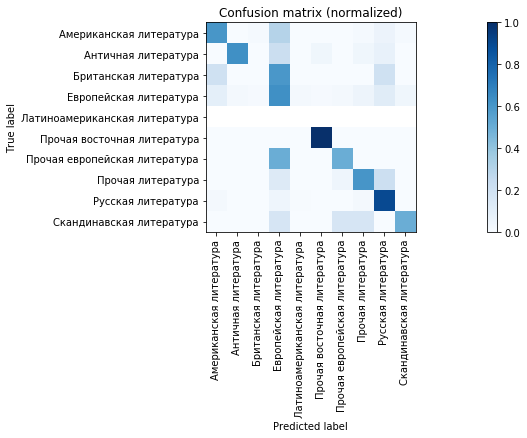

In [44]:
evaluate_prediction(predicted, test_data.tradition, traditions)

In [45]:
%%time
logreg = LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data.tradition)
predicted = logreg.predict(X_test_word_average)

CPU times: user 2.34 s, sys: 328 ms, total: 2.67 s
Wall time: 2.26 s


                               precision    recall  f1-score   support

      Американская литература       0.60      0.62      0.61        63
          Античная литература       0.80      0.89      0.84        18
        Британская литература       0.00      0.00      0.00         5
       Европейская литература       0.72      0.70      0.71       164
Латиноамериканская литература       0.00      0.00      0.00         5
  Прочая восточная литература       0.25      1.00      0.40         1
Прочая европейская литература       0.00      0.00      0.00         2
            Прочая литература       0.69      0.61      0.65        33
           Русская литература       0.84      0.84      0.84       152
     Скандинавская литература       0.45      0.50      0.48        10

                  avg / total       0.72      0.71      0.71       453

accuracy  0.7108167770419426
Макросредняя F1 мера -  0.45164328796219155
Микросредняя F1 мера -  0.7108167770419426

confusion matrix
 [[ 39   0 

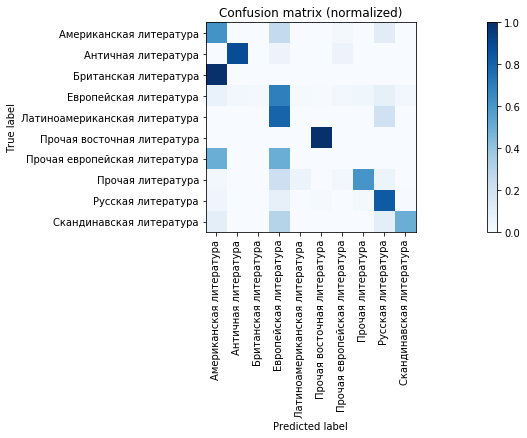

In [46]:
evaluate_prediction(predicted, test_data.tradition, traditions)

In [47]:
test_data.iloc()[12]['text']

'Горная лужайка с маленькой хижиной под нависшей скалой. На краю колодца сидит юная Раутенделейн, существо из мира фей, и расчёсывает свои густые рыжевато-золотистые волосы. Перегнувшись через край сруба, она зовёт Водяного. Ей скучно, бабушка Виттиха в лес ушла, глядишь, за болтовнёй быстрее время пролетит. Водяной не в духе, он устал от насмешек и колкостей очаровательной проказницы. Раутенделейн призывает Лешего развлечь её, но тот быстро надоедает ей своими назойливыми ухаживаниями. Девушка скрывается в хижине. Леший хвастается, сколь удачна была его последняя забава. Над обрывом люди построили новую церковь. Восемь лошадей везли к ней на телеге колокол, а он ухватился за колесо, колокол пошатнулся, понёсся вниз по камням со звоном и гулом и потонул в озере. Если бы не его, Лешего, прыть, замучил бы их всех колокол своим несносным завыванием. Появляется изнурённый, ослабевший Генрих, литейщик колоколов, и падает на траву неподалёку от хижины. Он сорвался в пропасть, откуда чудом вы

In [48]:
model.wv.most_similar(positive=[X_test_word_average[12]], restrict_vocab=100000, topn=30)[0:20]

[('симоронить', 0.7981598377227783),
 ('примолкать', 0.7820170521736145),
 ('опростоволоситься', 0.7787449359893799),
 ('даринька', 0.7708811163902283),
 ('гленарывать', 0.7705371379852295),
 ('вернее', 0.7630919218063354),
 ('утихомириваться', 0.7530175447463989),
 ('затосковать', 0.7512422204017639),
 ('прореветь', 0.7507715821266174),
 ('каперед', 0.7505208849906921),
 ('кажется', 0.7472989559173584),
 ('обратиться', 0.7439334392547607),
 ('присмиреть', 0.7438750267028809),
 ('уговариваться', 0.7422367334365845),
 ('пробасить', 0.7404808402061462),
 ('поторапливать', 0.7395084500312805),
 ('беловолосый', 0.7391301393508911),
 ('расстараться', 0.7381030321121216),
 ('куражиться', 0.7375030517578125),
 ('нездоровиться', 0.7360372543334961)]